# Project 3 MVE441

In [195]:
import pandas as pd
import numpy as np

In [196]:
# Read the features file
cats_N_dogs_features = pd.read_csv("CATSnDOGS.csv", delimiter=',').dropna(axis=1).to_numpy()

# Read the labels file
cats_N_dogs_labels = pd.read_csv("Labels.csv", delimiter=',').dropna(axis=1).to_numpy().ravel()



In [197]:
import matplotlib.pyplot as plt

In [198]:
def reshape_picture_array(image):
    image_resolution = int(np.sqrt(len(image)))
    # Extract image data from the row
    image = np.array(image).reshape((image_resolution, image_resolution))
    return image

In [199]:
def plot_grayscale_image(row):
    image_resolution = int(np.sqrt(len(row)))
    # Extract image data from the row
    image_data = reshape_picture_array(row).T  # Assuming the image data is stored in a 1D array and represents a 28x28 image
    # Plot the grayscale image
    plt.imshow(image_data, cmap='gray')
    plt.axis('off')  # Turn off axis
    plt.title('Grayscale Image')
    plt.show()

### Resampling, normalization and splitting.

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import random

In [201]:
# Split and standardize data
cats_N_dogs_features = StandardScaler().fit_transform(cats_N_dogs_features)

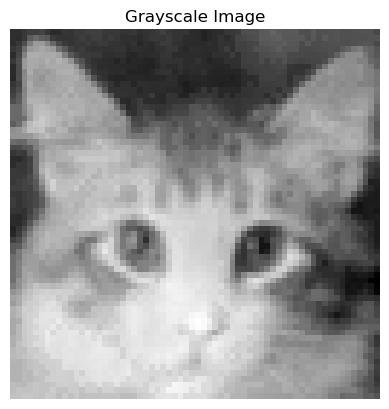

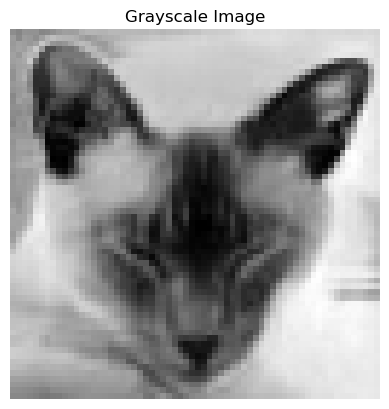

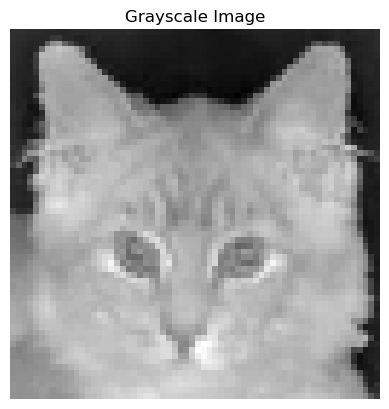

In [202]:
for i in range(0,3):
    index = random.randint(0, cats_N_dogs_features.shape[0])
    plot_grayscale_image(cats_N_dogs_features[index])

In [203]:
import numpy as np
from skimage import transform

# Initialize lists to store augmented images and labels
augmented_images = []
augmented_labels = []

# Iterate through the original dataset
for image, label in zip(cats_N_dogs_features, cats_N_dogs_labels):
    reshaped_image = reshape_picture_array(image)
    # Append original image and label
    augmented_images.append(image)
    augmented_labels.append(label)
    
    # Rotate image by 90 degrees
    rotated_image = transform.rotate(reshaped_image, angle=90, resize=False)
    augmented_images.append(rotated_image.flatten())
    augmented_labels.append(label)
    
    # Flip image horizontally
    flipped_image = np.fliplr(reshaped_image)
    augmented_images.append(flipped_image.flatten())
    augmented_labels.append(label)
    
    mirrored_image = np.flipud(reshaped_image)
    augmented_images.append(mirrored_image.flatten())
    augmented_labels.append(label)

# Convert lists to numpy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

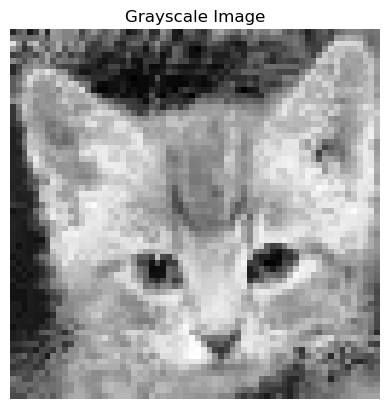

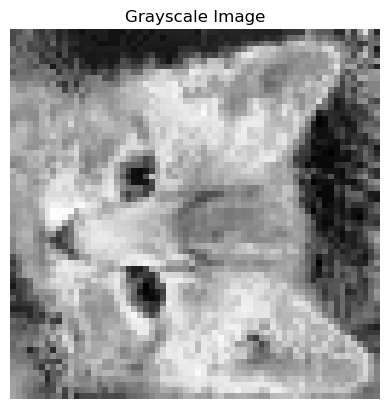

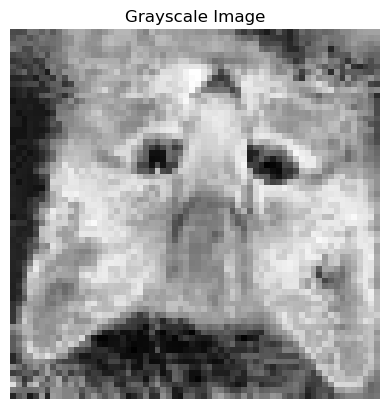

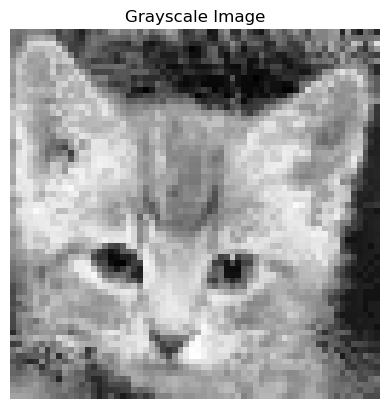

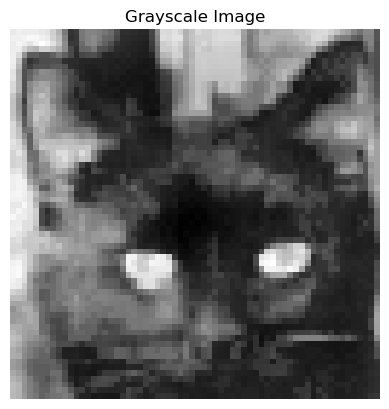

In [204]:
for i in range(0,5):
    index = random.randint(0, augmented_images.shape[0])
    plot_grayscale_image(augmented_images[i])

In [205]:
X_train, X_test, y_train, y_test = train_test_split(augmented_images, augmented_labels, test_size=0.2, random_state=42)
X_train_mid, X_test_mid, y_train_mid, y_test_mid = train_test_split(augmented_images, augmented_labels, test_size=0.5, random_state=42)
X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(augmented_images, augmented_labels, test_size=0.7, random_state=42)

sets = [[train_test_split(augmented_images, augmented_labels, test_size=0.2, random_state=42)],[train_test_split(augmented_images, augmented_labels, test_size=0.4, random_state=42)],
        [train_test_split(augmented_images, augmented_labels, test_size=0.6, random_state=42)]]

### Evaluate models

In [206]:
from sklearn.metrics import accuracy_score, f1_score

In [228]:
def evaluate_model(model, sets):
    performance = []
    for set in sets:
        scores = []
        model.fit(set[0][0], set[0][2])
        scores.append(accuracy_score(set[0][3], model.predict(set[0][1])))
        scores.append(f1_score(set[0][3], model.predict(set[0][1]), average='macro'))
        performance.append(scores)
    return performance

### KNN

In [207]:
from sklearn.neighbors import KNeighborsClassifier

knn_performance = []

for n in [1,5,10,15,20]:
    scores = []
    scores.append(n)
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, knn_model.predict(X_test)))
    scores.append(f1_score(y_test, knn_model.predict(X_test), average='macro'))
    knn_performance.append(scores)




In [208]:
def plot_metrics(performance_array, x_axis, y_axis, title):
    x_values = [x[0] for x in performance_array]
    accuracy = [x[1] for x in performance_array]
    f1 = [x[2] for x in performance_array]
    
    plt.title(title)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    
    plt.plot(x_values, accuracy, label ='Accuracy')
    plt.plot(x_values, f1, label='F1 score')
    plt.legend(loc="upper left")

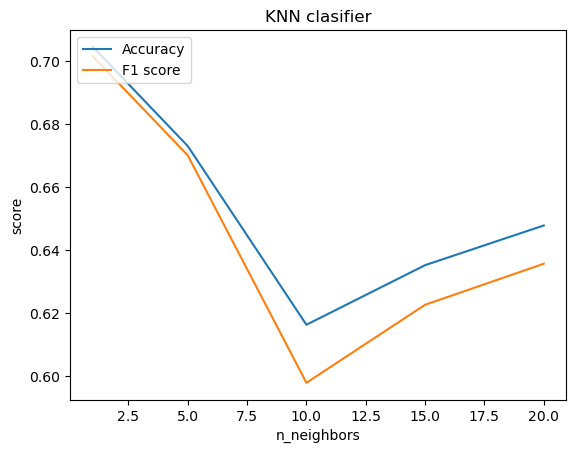

In [209]:
plot_metrics(knn_performance,"n_neighbors", "score", "KNN clasifier")


In [230]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_performance = evaluate_model(knn_model, sets)
print(knn_performance)


[[0.7044025157232704, 0.7013786213786214], [0.7066246056782335, 0.7032104134577633], [0.7016806722689075, 0.7009203539823009]]


### LDA

In [218]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [232]:
LDA_model = LinearDiscriminantAnalysis()
LDA_performance = evaluate_model(LDA_model, sets)

In [234]:
print(LDA_performance)

[[0.6981132075471698, 0.6966613672496025], [0.6656151419558359, 0.6648647570414107], [0.6764705882352942, 0.674609375]]


### Logistic regression

In [224]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg_model = LogisticRegression